# Nigerian Music scraped from Spotify - an analysis

In [1]:
!pip list

Package                   Version
------------------------- --------------
anyio                     4.3.0
appnope                   0.1.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.8.2
Brotli                    1.1.0
cached-property           1.5.2
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
entrypoints               0.4
exceptiongroup            1.2.0
executing                 2.0.1
fastjsonschema            2.19.1
Flask               

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../data/nigerian-songs.csv')
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

Text(0.5, 1.0, 'Top Genres')

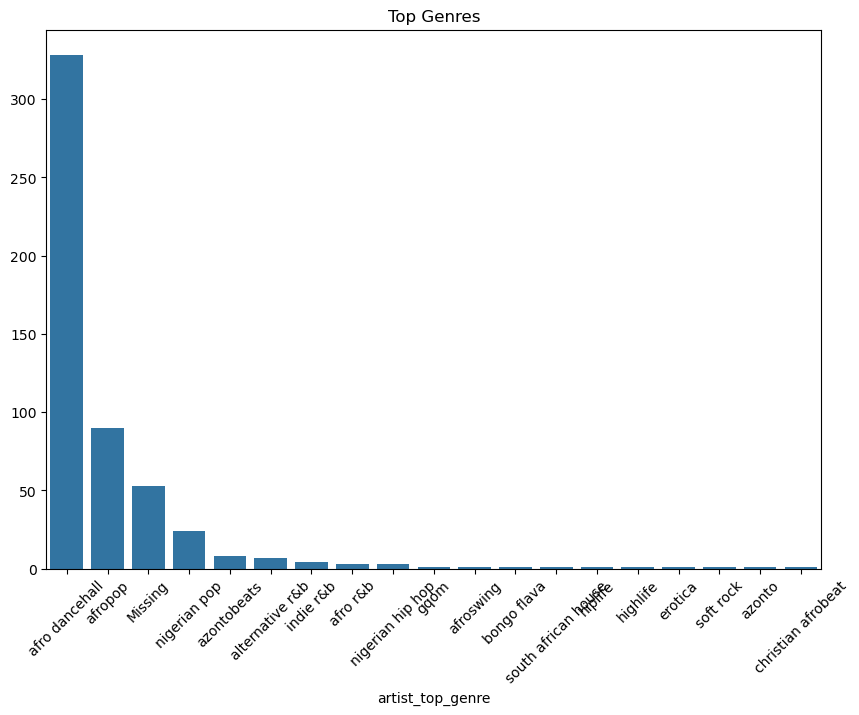

In [8]:
# Top genres
import seaborn as sns

top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10, 7))
sns.barplot(x=top.index, y=top.values)
plt.xticks(rotation=45)
plt.title('Top Genres')

Text(0.5, 1.0, 'Top Genres')

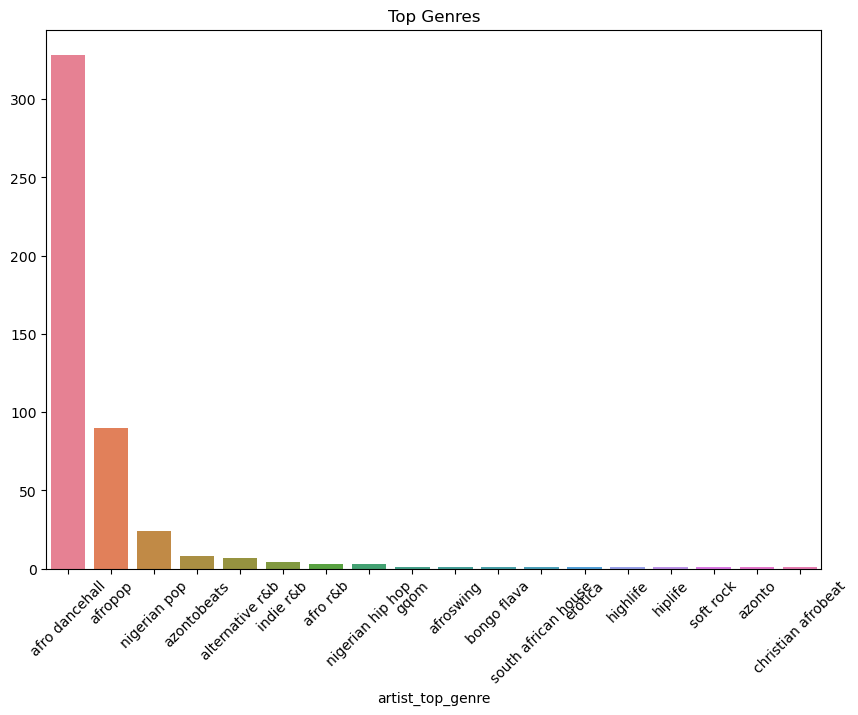

In [20]:
# Get rid of missinog data by filtering out rows with missing values
df = df[df['artist_top_genre'] != 'Missing']
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10, 7))
sns.barplot(x=top.index, y=top.values, legend=False, hue=top.index)
plt.xticks(rotation=45)
plt.title('Top Genres')

Text(0.5, 1.0, 'Top 3 Genres')

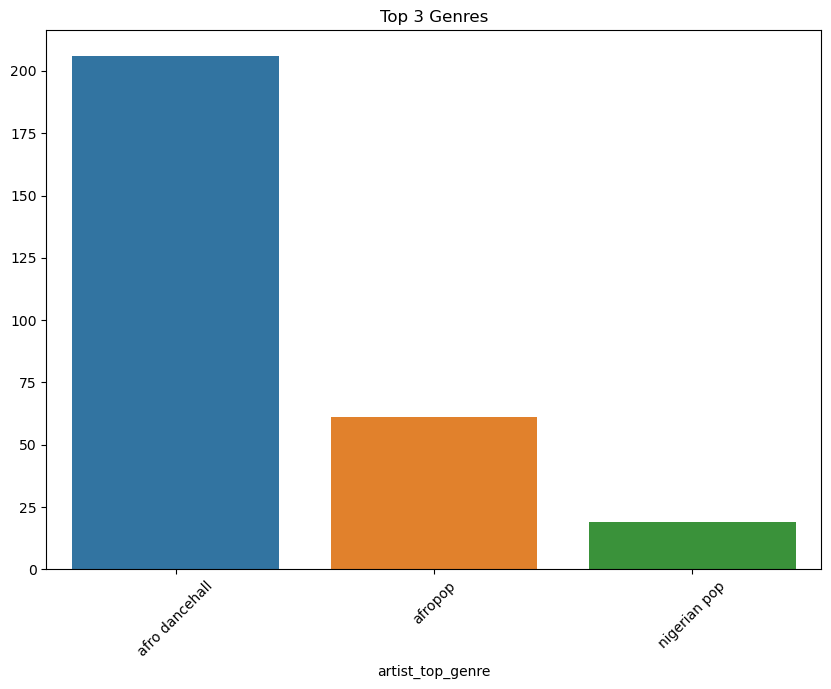

In [21]:
# filter out again 
df = df[(df['artist_top_genre'] == 'afro dancehall')
        | (df['artist_top_genre'] == 'afropop') 
        | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10, 7))
sns.barplot(x=top.index, y=top.values, legend=False, hue=top.index)
plt.xticks(rotation=45)
plt.title('Top 3 Genres')

<Axes: >

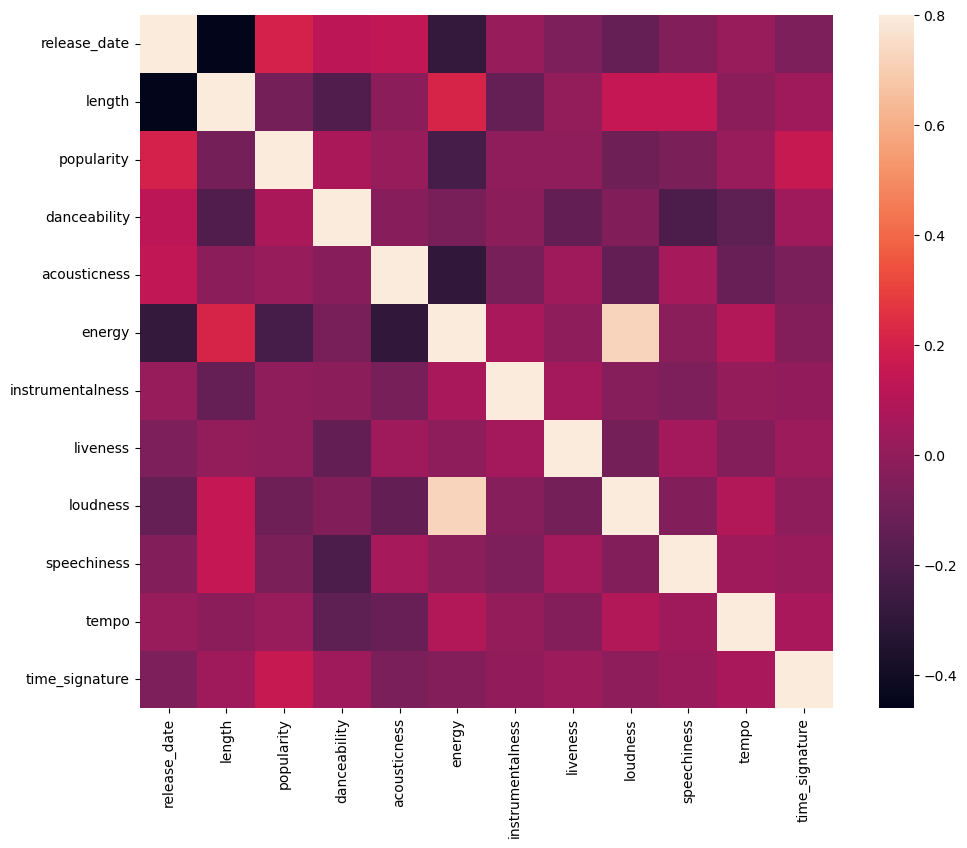

In [23]:
# Does the data correlate ?
# Select only numerical columns
df_num = df.select_dtypes(include=['float64', 'int64'])
corrmat = df_num.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

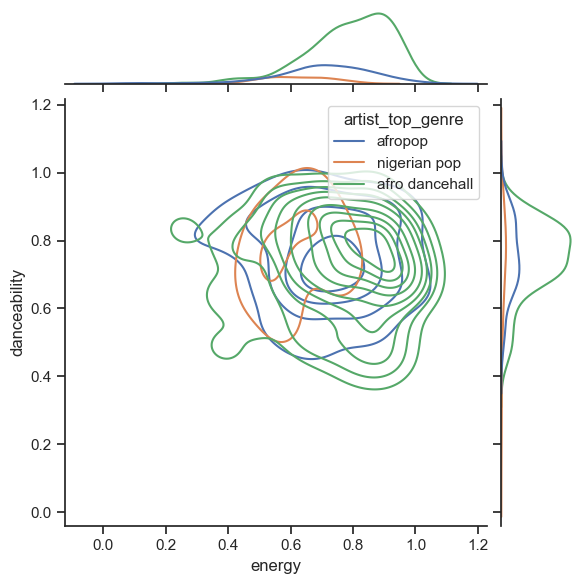

In [29]:
# Examine our top three genres data distribution for popularity and danceability
# along a given x and y axis.
sns.set_theme(style="ticks")

g = sns.jointplot(
    data=df,
    x="energy", y="danceability", hue="artist_top_genre",
    kind="kde",
)

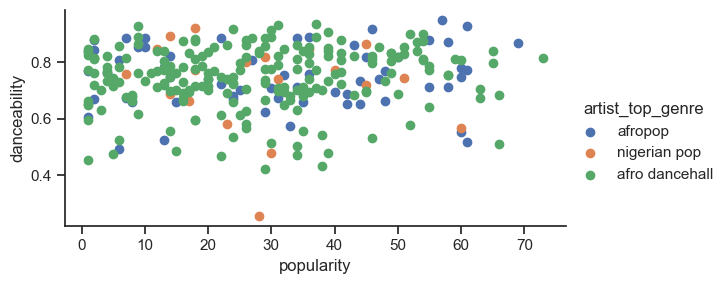

In [33]:
# Scatter pllot
sns.FacetGrid(df, hue="artist_top_genre", aspect=2,) \
   .map(plt.scatter, "popularity", "danceability") \
   .add_legend()